# **Advanced Digital Signal Processing (ADSP) Lab - Python Lab Manual**
> **Course Code:** EEE G613 \
**Instructer in Charge:** Dr. Rajesh Kumar Tripathy \
**Teaching Assistant:** Shaswati Dash\
**Lab Technician:** Ramesh Pokanati





**********************************************
**********************************************

# **Experiment No. - 9**

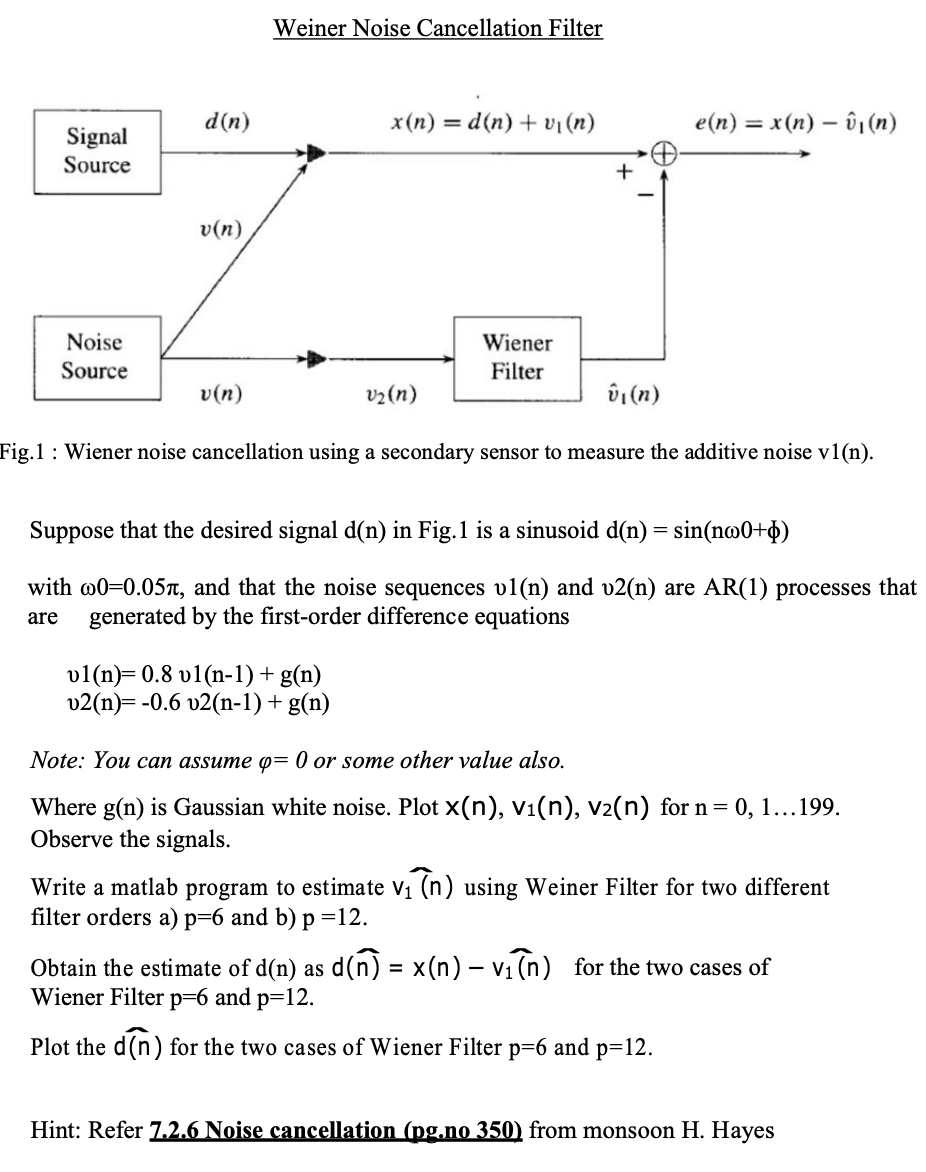

# *Python Code-*

In [39]:
#import libraries
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

In [40]:
# Function to calculate the covariance matrix
def covar(x, p):
  x = x - np.mean(x)
  m = len(x)
  R = np.dot(convm(x, p).T, convm(x, p)) / (m - 1)
  return R

# Function to create convolution matrix
def convm(x, p):
  return np.convolve(x, x[::-1], mode='valid')[:, None]


In [41]:
# Part a
np.random.seed(5)
l = 200
w = 0.05 * np.pi
d = np.sin(w * np.arange(1, l + 1))
g = np.random.randn(l)
v1 = np.convolve(g, [1, -0.8], mode='full')[:l]
v2 = np.convolve(g, [1, 0.6], mode='full')[:l]
x = d + v1
N=l
P=6
MSE = []
for p in range(1, P + 1):
  rv = covar(v2, p)
  rxv2 = np.dot(convm(x, p).T, convm(v2, p)) / (N - 1)
  w = rxv2[0, :] / rv
  w = w.flatten() # Flatten the 'w' array
  v1hat = signal.convolve(w, v2, mode='full')[:l]
  filtered_signal = x - v1hat
  MSE.append(np.mean((d - filtered_signal) ** 2))

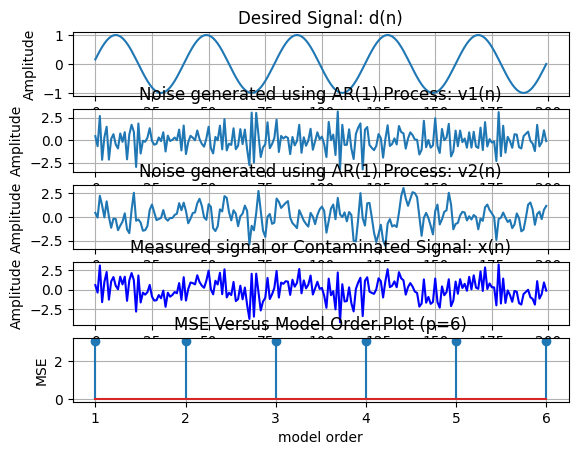

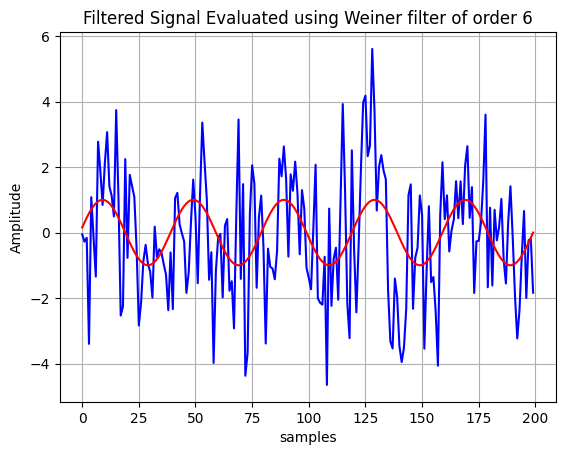

In [42]:
#Plotting
plt.figure(1)
plt.subplot(5, 1, 1)
plt.plot(d)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Desired Signal: d(n)')
plt.grid(True)
plt.subplot(5, 1, 2)
plt.plot(v1)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Noise generated using AR(1) Process: v1(n)')
plt.grid(True)
plt.subplot(5, 1, 3)
plt.plot(v2)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Noise generated using AR(1) Process: v2(n)')
plt.grid(True)
plt.subplot(5, 1, 4)
plt.plot(x, 'b')
plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('Measured signal or Contaminated Signal: x(n)')
plt.grid(True)
kk = np.arange(1, P + 1)
plt.subplot(5, 1, 5)
plt.stem(kk, MSE)
plt.xlabel('model order')
plt.ylabel('MSE')
plt.title('MSE Versus Model Order Plot (p=6)')
plt.grid(True)
plt.figure(2)
plt.plot(filtered_signal, 'b')
plt.plot(d, 'r')
# Write a python program to estimate vˆ1 (n) using Weiner Filter for two different filter orders a) p=6
plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('Filtered Signal Evaluated using Weiner filter of order 6')
plt.grid(True)
plt.show()

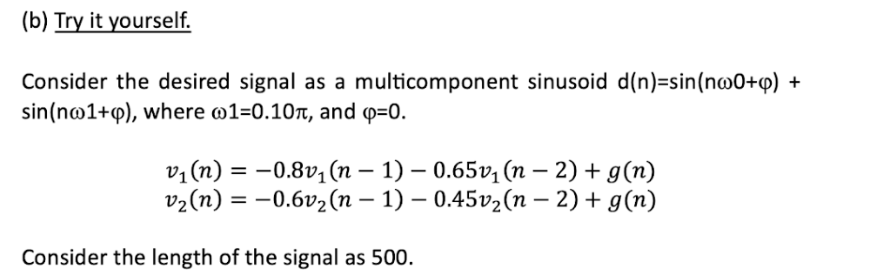

In [43]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [44]:
# Function to calculate the covariance matrix
def covar(x, p):
  x = x - np.mean(x)
  m = len(x)
  R = np.dot(convm(x, p).T, convm(x, p)) / (m - 1)
  return R

# Function to create convolution matrix
def convm(x, p):
  return np.convolve(x, p, mode='valid')[:, None]

In [45]:
np.random.seed(5)
l = 500
w = 0.10 * np.pi
d = np.sin(w * np.arange(1, l + 1))
g = np.random.randn(l)
v1 = np.convolve(g, [1, 0.8, 0.65], mode='full')[:l]
v2 = np.convolve(g, [1, 0.6, 0.45], mode='full')[:l]
x = d + v1
N=l
P=12 #Order of filter
MSE = []
for p in range(1, P + 1):
  rv = covar(v2, p)
  rxv2 = np.dot(convm(x, p).T, convm(v2, p)) / (N - 1)
  w = rxv2[0, :] / rv
  w = w.flatten() # Flatten the 'w' array
  v1hat = signal.convolve(w, v2, mode='full')[:l]
  # v1hat = signal.lfilter(w, [1], v2)
  filtered_signal = x - v1hat
  MSE.append(np.mean((d - filtered_signal) ** 2))

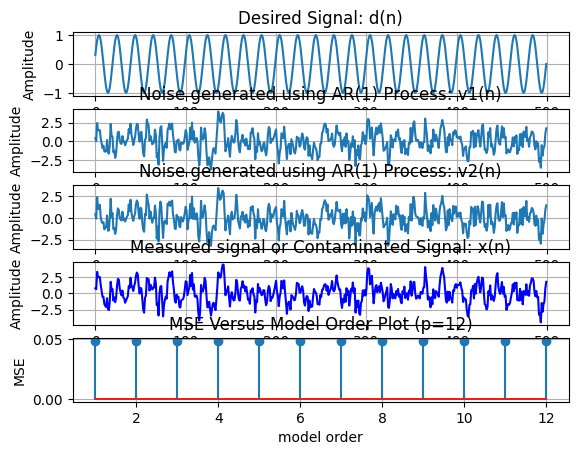

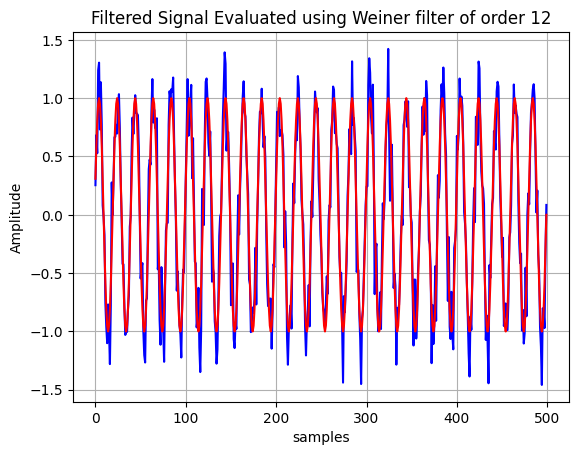

In [46]:
#plotting
plt.figure(1)
plt.subplot(5, 1, 1)
plt.plot(d)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Desired Signal: d(n)')
plt.grid(True)
plt.subplot(5, 1, 2)
plt.plot(v1)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Noise generated using AR(1) Process: v1(n)')
plt.grid(True)
plt.subplot(5, 1, 3)
plt.plot(v2)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Noise generated using AR(1) Process: v2(n)')
plt.grid(True)
plt.subplot(5, 1, 4)
plt.plot(x, 'b')
plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('Measured signal or Contaminated Signal: x(n)')
plt.grid(True)
kk = np.arange(1, P + 1)
plt.subplot(5, 1, 5)
plt.stem(kk, MSE)
plt.xlabel('model order')
plt.ylabel('MSE')
plt.title('MSE Versus Model Order Plot (p=12)')
plt.grid(True)
plt.figure(2)
plt.plot(filtered_signal, 'b')
plt.plot(d, 'r')
plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('Filtered Signal Evaluated using Weiner filter of order 12')
plt.grid(True)
plt.show()